# 1.1) Analisando os Tipos de Dados

In [ ]:
# Importações
!pip install lazypredict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
# Alterando a vizualização(vai ser relevante futuramente)
pd.set_option('display.max_columns', None)

# Importando o data frame dos inscritos
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1DloAUKJym4ctB5AgS0g2m4rqwUWukI0Y')
df

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.00,management,single,tertiary,NaN,no,4522.00,no,no,cellular,28,aug,55,1.00,-1,0.00,unknown,no
1,1,42.00,blue-collar,married,primary,NaN,yes,398.00,yes,n,unknown,16,may,251,4.00,-1,0.00,unknown,no
2,2,26.00,student,single,secondary,Lisboa,no,706.00,no,no,unknown,8,oct,118,1.00,105,2.00,other,no
3,3,54.00,management,married,tertiary,NaN,no,0.00,no,y,cellular,19,nov,307,3.00,-1,0.00,unknown,no
4,4,43.00,self-employed,married,secondary,Porto,no,918.00,yes,no,unknown,6,may,193,1.00,-1,0.00,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,43.00,management,married,tertiary,Lisboa,no,13851.00,yes,no,cellular,21,nov,259,1.00,-1,0.00,unknown,no
39996,39996,34.00,blue-collar,married,primary,NaN,no,357.00,yes,no,unknown,14,may,197,2.00,-1,0.00,unknown,no
39997,39997,30.00,management,single,tertiary,NaN,no,4889.00,no,no,cellular,11,aug,545,2.00,-1,0.00,unknown,yes
39998,39998,40.00,self-employed,married,tertiary,Lisboa,no,271.00,yes,no,cellular,21,nov,124,3.00,102,4.00,failure,no


Obtendo Perfil dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

In [ ]:
df.describe(include='object')

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


In [ ]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [ ]:
df.nunique()

id           40000
age             79
job             13
marital          3
education        4
location         6
default          2
balance       6725
housing          2
loan             4
contact          3
day             31
month           12
duration      1527
campaign        44
pdays          539
previous        40
poutcome         4
y                2
dtype: int64

Vamos começar pegando as categorias que só possuem valores binários e transformando em numéricos para facilitar a análise

In [ ]:
replacer = { 'y' : 1, 'yes': 1, 'n' : 0 , 'no' : 0}
df[['default','housing','loan','y']] = df[['default','housing','loan','y']].replace(replacer)


As features mudadas foram: default, housing, loan e o target. Vejamos como está a distribuição de cada uma delas:


In [ ]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.00,management,single,tertiary,NaN,0,4522.00,0,0,cellular,28,aug,55,1.00,-1,0.00,unknown,0
1,1,42.00,blue-collar,married,primary,NaN,1,398.00,1,0,unknown,16,may,251,4.00,-1,0.00,unknown,0
2,2,26.00,student,single,secondary,Lisboa,0,706.00,0,0,unknown,8,oct,118,1.00,105,2.00,other,0
3,3,54.00,management,married,tertiary,NaN,0,0.00,0,1,cellular,19,nov,307,3.00,-1,0.00,unknown,0
4,4,43.00,self-employed,married,secondary,Porto,0,918.00,1,0,unknown,6,may,193,1.00,-1,0.00,unknown,0


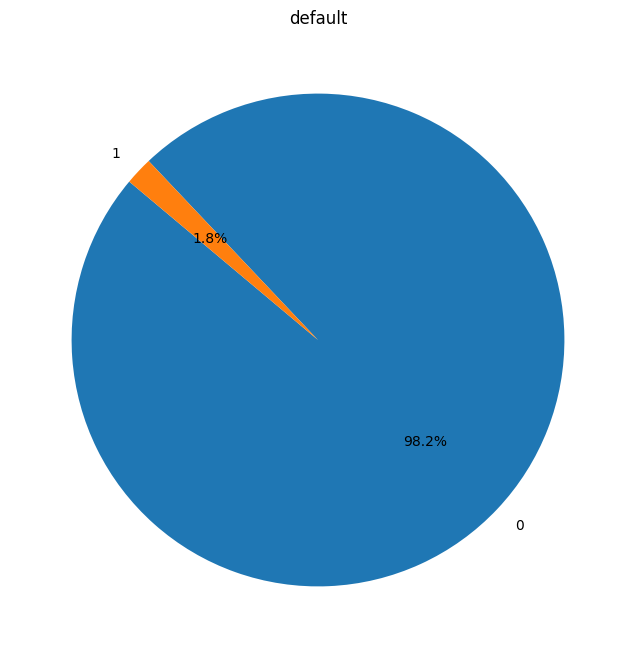

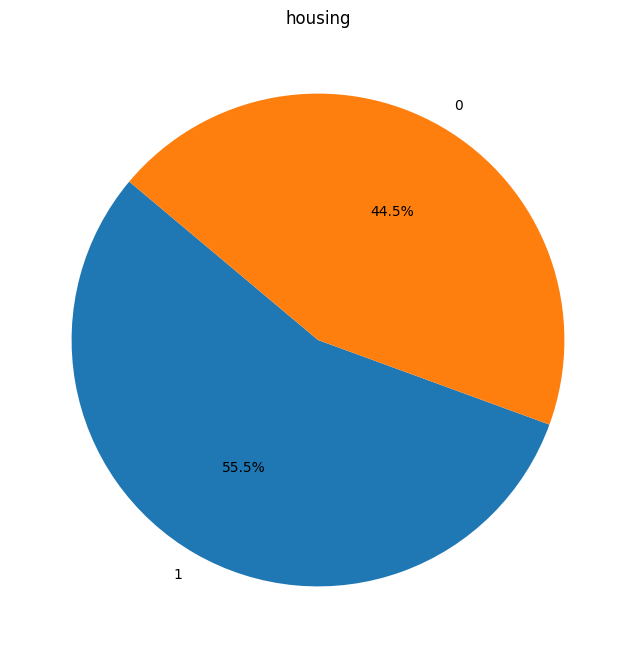

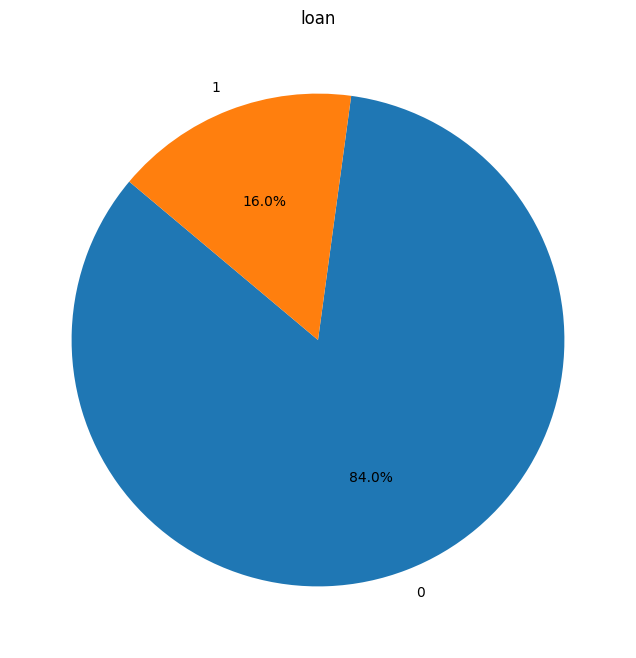

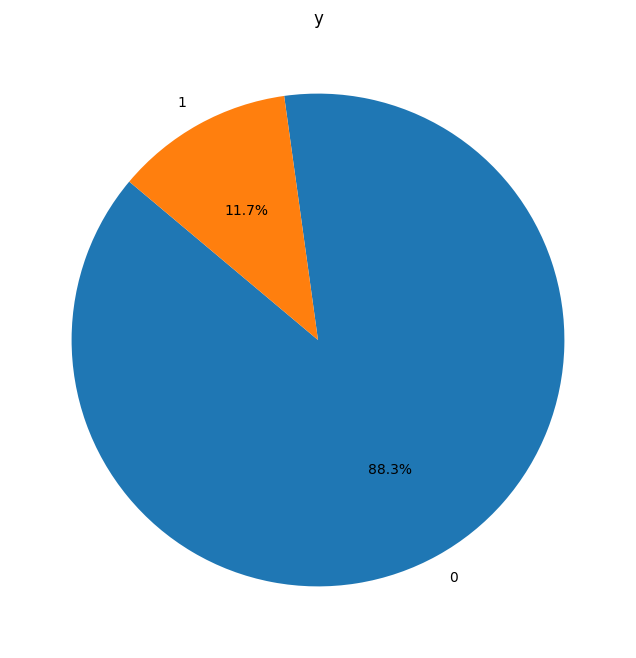

In [ ]:
mudadas = ['default','housing','loan','y']
for i in mudadas:
  contagem = df[i].value_counts()
  plt.figure(figsize=(8, 8))
  plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=140)
  plt.title(i)
  plt.show()

Separação do dataset em Categórico e Numérico

In [ ]:
# y só pode assumir 2 valores então no intuito de fazermos um mapa de calor iremos considerá-la uma features numérica

dados_numericos = ['id','age','balance','day','duration','campaign','pdays','previous','default','housing','loan','y']
dados_categoricos = ['job','marital','education','location','contact','month','poutcome']
df_num = df[dados_numericos]
df_cat = df[dados_categoricos]


Estudando Primeiramente os dados Numéricos

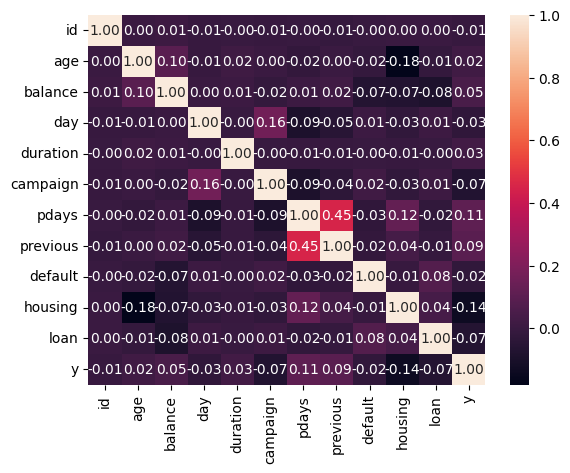

<Figure size 9000x9000 with 0 Axes>

In [ ]:
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")
plt.figure(figsize=(90, 90))
plt.show()

Vamos analisar alguns gráficos de correlação que tiveram maior relação com o target


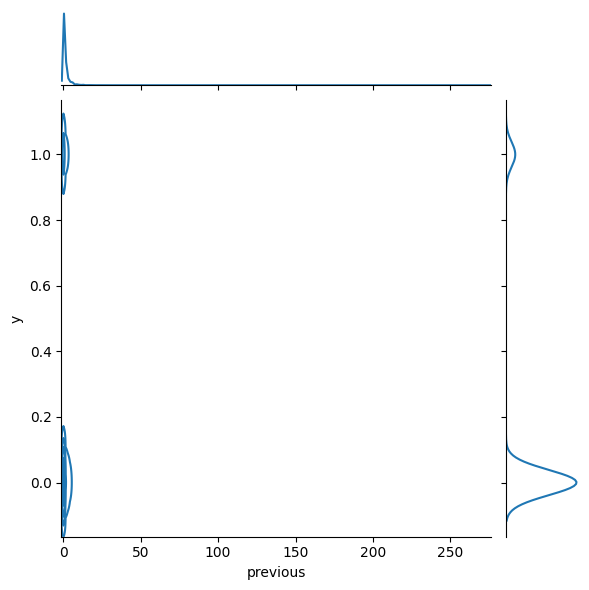

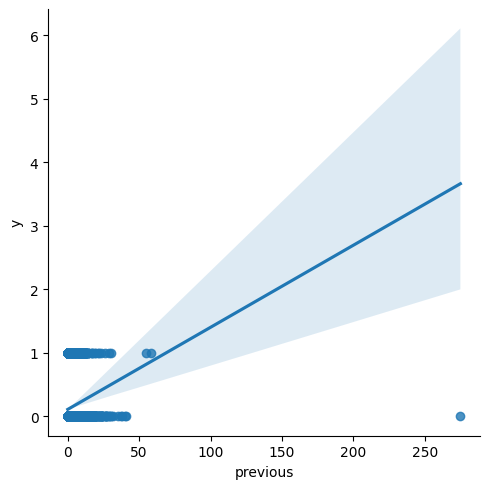

In [ ]:
sns.jointplot(df,x = 'previous',y = 'y', kind='kde')
sns.lmplot(data=df,x = 'previous',y = 'y')

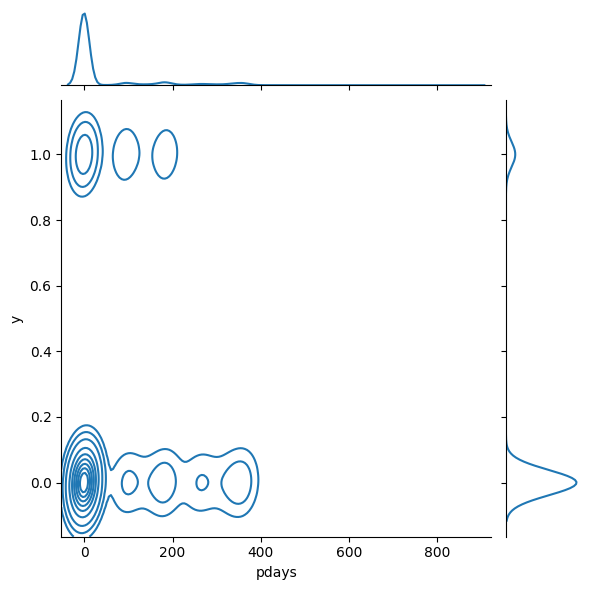

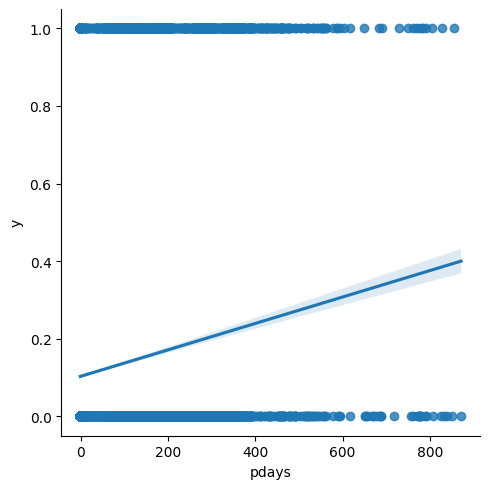

In [ ]:
sns.jointplot(df,x = 'pdays',y = 'y', kind='kde')
sns.lmplot(data=df,x = 'pdays',y = 'y')

# 1.2) Limpeza do Dataset

O id, como esperado não tem correlação com nada então vamos começar removendo-o, além disso, obtivemos algumas correlações entre features com alto grau porém que não estão diretamente ligadas ao target, vamos deixar alguns gráficos que registram essa correlação apenas por desencargo de consiência. Por fim vamos também tratar os dados faltantes no meio do caminho.

In [ ]:
df.drop(columns = 'id', axis = 1, inplace = True)

In [ ]:
# dados faltantes
df.isnull().sum()

age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [ ]:
df.nunique()

age            79
job            13
marital         3
education       4
location        6
default         2
balance      6725
housing         2
loan            2
contact         3
day            31
month          12
duration     1527
campaign       44
pdays         539
previous       40
poutcome        4
y               2
dtype: int64

In [ ]:
df['poutcome'].unique()


array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [ ]:
df['location'].unique()

array([nan, 'Lisboa', 'Porto', 'Amadora', 'Braga', 'Coimbra', 'Faro'],
      dtype=object)

Correlação entre location e y: -0.00


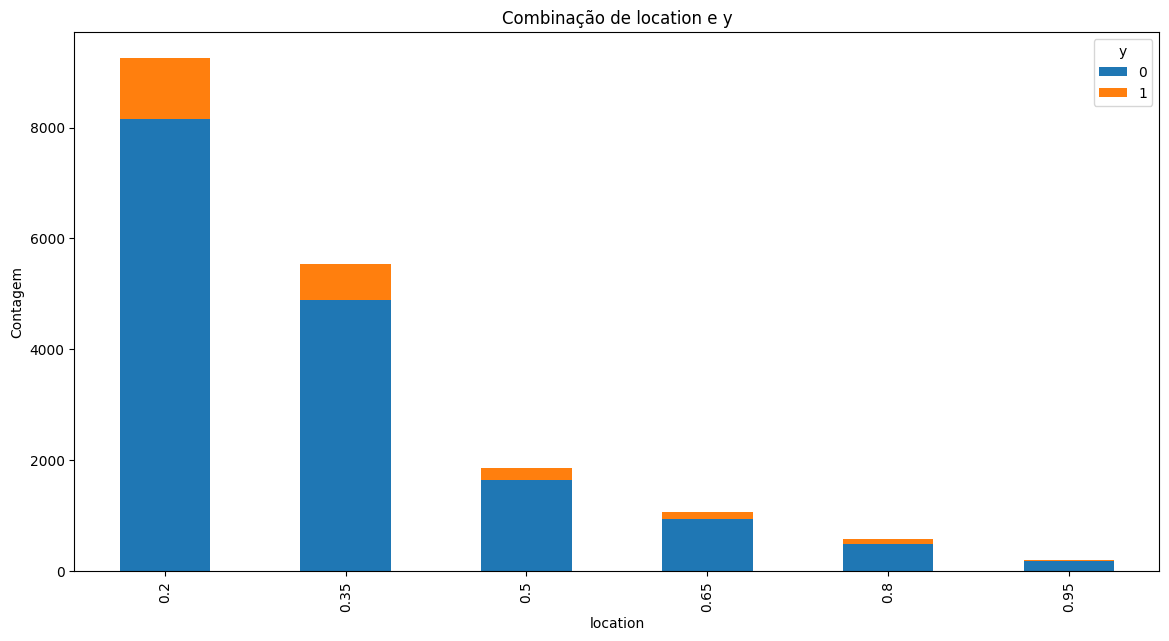

In [ ]:
dic = {
    'Lisboa': 0.2, 'Porto' : 0.35, 'Amadora' : 0.5, 'Braga' : 0.65, 'Coimbra' : 0.80,  'Faro' : 0.95
}

df['location'].replace(dic, inplace = True)
feature1 = 'location'
feature2 = 'y'


# Calcular a correlação entre as duas features
correlation = df[feature1].corr(df[feature2])
print(f'Correlação entre {feature1} e {feature2}: {correlation:.2f}')

contingency_table = pd.crosstab(df[feature1], df[feature2])

contingency_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title(f'Combinação de {feature1} e {feature2}')
plt.xlabel(feature1)
plt.ylabel('Contagem')
plt.legend(title=feature2)
plt.show()

Vemos que não existe correlação entre a localização e o target, como existem muitos dados faltantes vamos apenas dropar essas linhas


In [ ]:
df.drop(columns = 'location', axis = 1, inplace = True)

Existem muitos poucos casos em que o 'marital' tem dados faltantes, por isso podemos apenas deletar essas colunas

In [ ]:
df = df.dropna(subset=['marital'])

In [ ]:
df.isnull().sum()

age          1194
job          1346
marital         0
education       0
default         0
balance      1788
housing         0
loan            0
contact       732
day             0
month           0
duration        0
campaign     1393
pdays           0
previous      297
poutcome        0
y               0
dtype: int64

In [ ]:
df['job'].unique()
df['job'] = df['job'].replace({"admin." : "administrator"})

In [ ]:
df.nunique()

age            79
job            12
marital         3
education       4
default         2
balance      6721
housing         2
loan            2
contact         3
day            31
month          12
duration     1524
campaign       44
pdays         539
previous       40
poutcome        4
y               2
dtype: int64

Remoção de Outliers

Valores: [57435.0, 56831.0, 59649.0, 52587.0, 64343.0, 81204.0, 52527.0, 66653.0, 66721.0, 58544.0, 102127.0, 81204.0, 98417.0, 52499.0, 52587.0]
Índices: [3085, 6190, 10698, 12492, 15464, 15808, 16515, 17092, 21065, 30492, 32827, 32995, 34914, 38472, 39245]


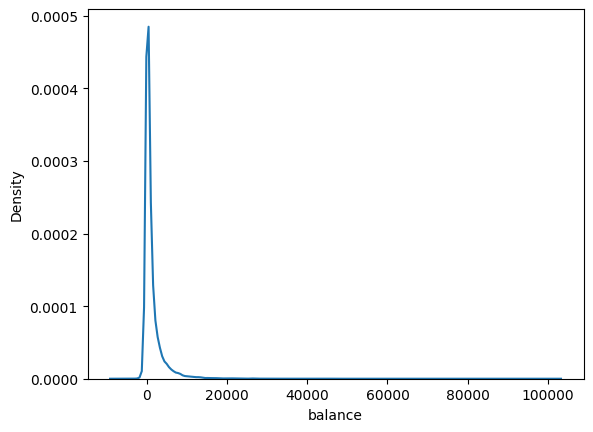

In [ ]:
sns.kdeplot(df['balance'])

indices_para_remover = df[df['balance'] > 50000].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'balance'].tolist())
print("Índices:", indices_para_remover)

#Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='balance', ylabel='Density'>

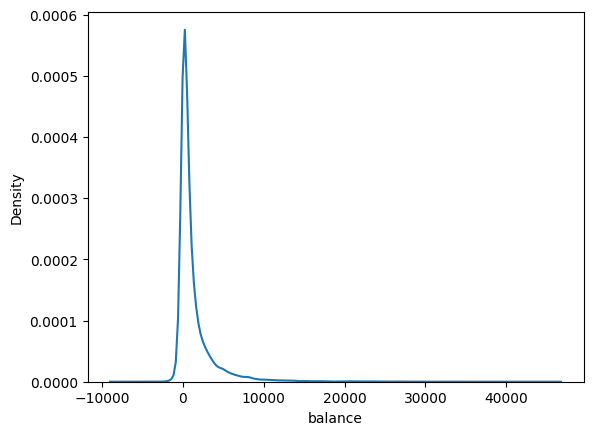

In [ ]:
sns.kdeplot(df['balance'])


<Axes: xlabel='age', ylabel='Density'>

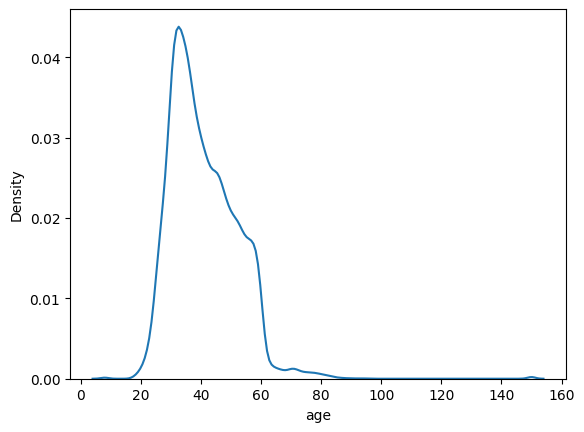

In [ ]:
sns.kdeplot(df['age'])

In [ ]:
indices_para_remover = df[df['age'] > 100].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'age'].tolist())
print("Índices:", indices_para_remover)

# Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)


Valores: [150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]
Índices: [1468, 4748, 4887, 6221, 11280, 11422, 14336, 14534, 15182, 15260, 15924, 23191, 25580, 27758, 27889, 28353, 30403, 30926, 31720, 32265, 35019, 35188, 36518, 37019, 37810, 38133, 38639]


<Axes: xlabel='age', ylabel='Density'>

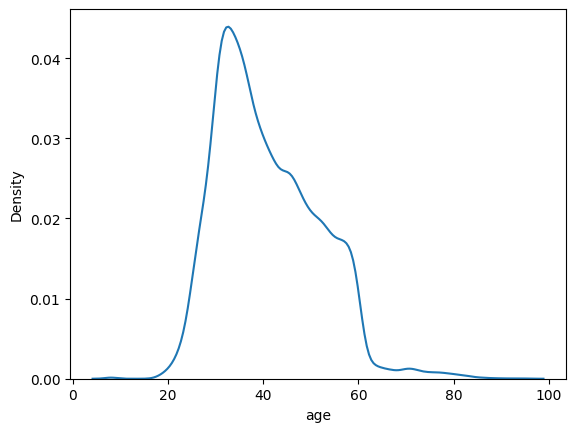

In [ ]:
sns.kdeplot(df['age'])


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41.00,management,single,tertiary,0,4522.00,0,0,cellular,28,aug,55,1.00,-1,0.00,unknown,0
1,42.00,blue-collar,married,primary,1,398.00,1,0,unknown,16,may,251,4.00,-1,0.00,unknown,0
2,26.00,student,single,secondary,0,706.00,0,0,unknown,8,oct,118,1.00,105,2.00,other,0
3,54.00,management,married,tertiary,0,0.00,0,1,cellular,19,nov,307,3.00,-1,0.00,unknown,0
4,43.00,self-employed,married,secondary,0,918.00,1,0,unknown,6,may,193,1.00,-1,0.00,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39856,43.00,management,married,tertiary,0,13851.00,1,0,cellular,21,nov,259,1.00,-1,0.00,unknown,0
39857,34.00,blue-collar,married,primary,0,357.00,1,0,unknown,14,may,197,2.00,-1,0.00,unknown,0
39858,30.00,management,single,tertiary,0,4889.00,0,0,cellular,11,aug,545,2.00,-1,0.00,unknown,1
39859,40.00,self-employed,married,tertiary,0,271.00,1,0,cellular,21,nov,124,3.00,102,4.00,failure,0


<Axes: xlabel='day', ylabel='Count'>

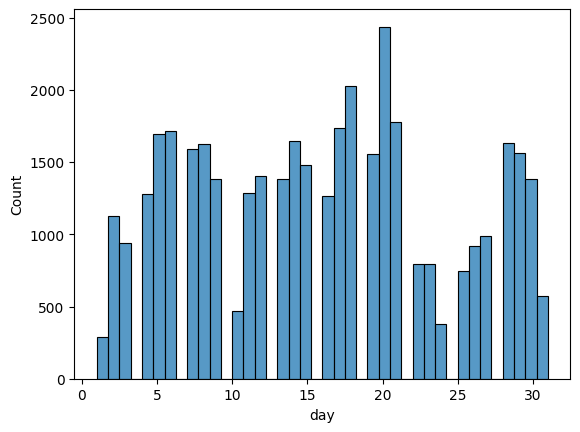

In [ ]:
sns.histplot(df['day'])


Valores: [75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000, 75000]
Índices: [341, 688, 1131, 1324, 1964, 2113, 2163, 2702, 3412, 4282, 4469, 5495, 6098, 6755, 7511, 7566, 8776, 9137, 9955, 11753, 12160, 12459, 14407, 15519, 16310, 18291, 19191, 19314, 19745, 19988, 20393, 22491, 23203, 23731, 23760, 24003, 24254, 24855, 25617, 25808, 26133, 26568, 27117, 27274, 27644, 27792, 28536, 29712, 29785, 30540, 30823, 31144, 31753, 35086, 35794, 35862, 36148, 36172, 36320, 36822, 37056, 37251, 37643, 37705]


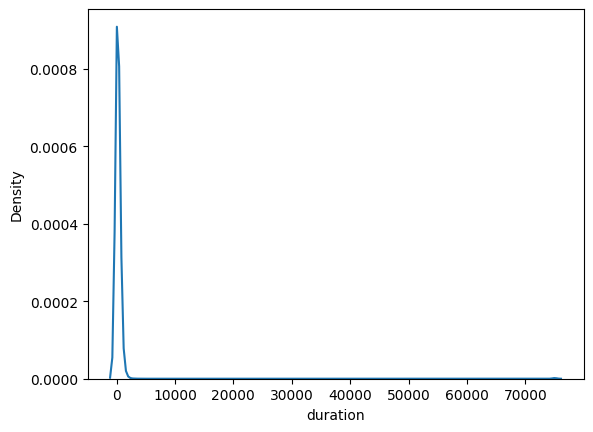

In [ ]:
sns.kdeplot(df['duration'])
indices_para_remover = df[df['duration'] > 5000].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'duration'].tolist())
print("Índices:", indices_para_remover)

# Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='duration', ylabel='Density'>

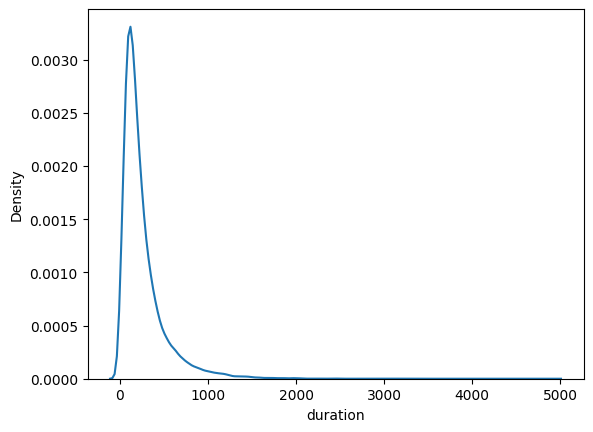

In [ ]:
sns.kdeplot(df['duration'])

Valores: [36.0, 43.0, 55.0, 41.0, 37.0, 38.0, 38.0, 39.0, 43.0, 36.0, 36.0, 41.0, 50.0, 58.0, 37.0]
Índices: [2439, 10824, 12390, 13199, 17445, 18603, 19420, 20088, 22509, 25018, 26352, 31988, 35455, 35585, 38707]


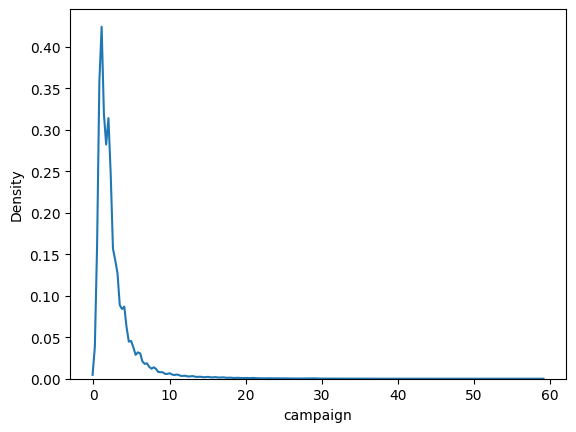

In [ ]:
sns.kdeplot(df['campaign'])
indices_para_remover = df[df['campaign'] > 35].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'campaign'].tolist())
print("Índices:", indices_para_remover)

# Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='campaign', ylabel='Density'>

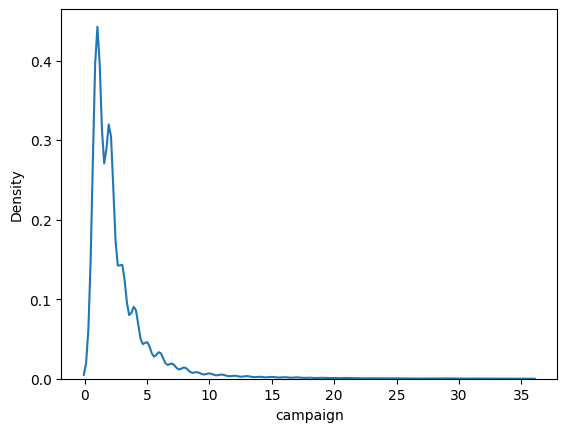

In [ ]:
sns.kdeplot(df['campaign'])


Valores: [40.0, 41.0, 37.0, 275.0, 58.0, 55.0, 35.0, 38.0, 32.0]
Índices: [452, 1042, 1700, 2597, 12436, 31323, 33323, 34335, 39714]


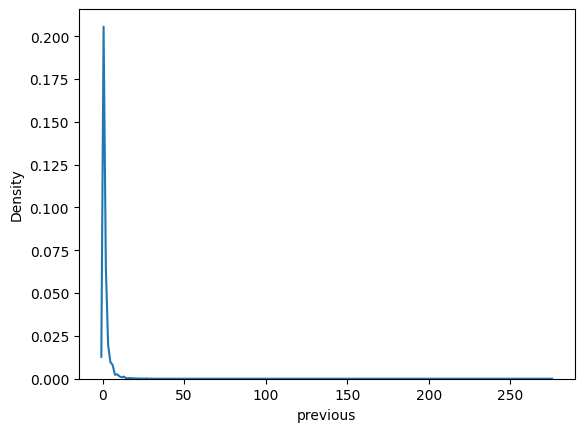

In [ ]:
sns.kdeplot(df['previous'])
indices_para_remover = df[df['previous'] > 30].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'previous'].tolist())
print("Índices:", indices_para_remover)

# Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='previous', ylabel='Density'>

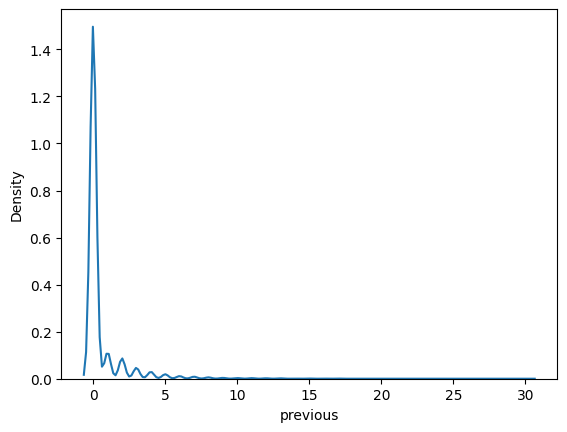

In [ ]:
sns.kdeplot(df['previous'])


Valores: [791, 772, 774, 779, 756, 728, 782, 828, 792, 792, 779, 749, 760, 871, 769, 771, 717, 854, 775, 761, 826, 784, 808, 850, 831, 838, 804]
Índices: [1055, 1525, 1919, 3552, 5925, 6674, 7131, 8597, 9886, 11368, 12505, 13392, 16419, 17810, 18372, 20098, 20640, 21420, 27155, 27529, 32157, 33432, 33499, 34535, 36137, 36218, 36821]


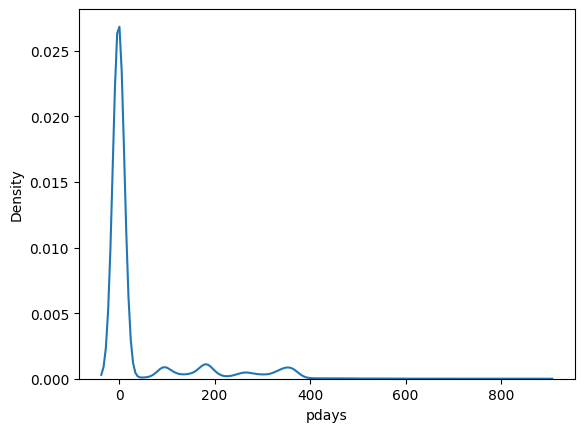

In [ ]:
sns.kdeplot(df['pdays'])
indices_para_remover = df[df['pdays'] > 700].index.tolist()

# Exibir os valores e índices para verificação
print("Valores:", df.loc[indices_para_remover, 'pdays'].tolist())
print("Índices:", indices_para_remover)

# Remover as linhas pelos índices
df = df.drop(indices_para_remover)

# Redefinir os índices do DataFrame
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='pdays', ylabel='Density'>

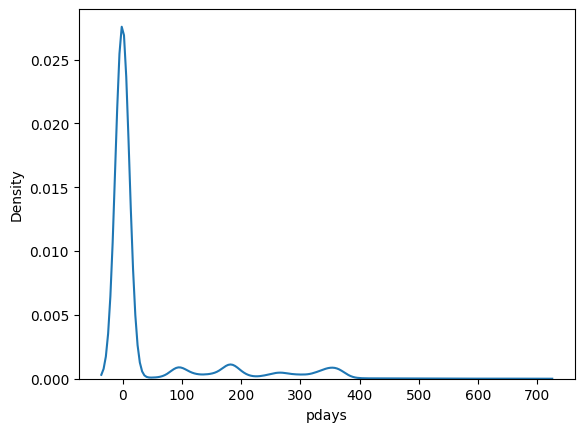

In [ ]:
sns.kdeplot(df['pdays'])


Analisando se será preciso um oversampling ou undersampling no futuro


In [ ]:
categoricas = np.array(("job", "month", "contact", "marital", "education"))
numericas = np.array(("age", "balance","duration","campaign","day"))

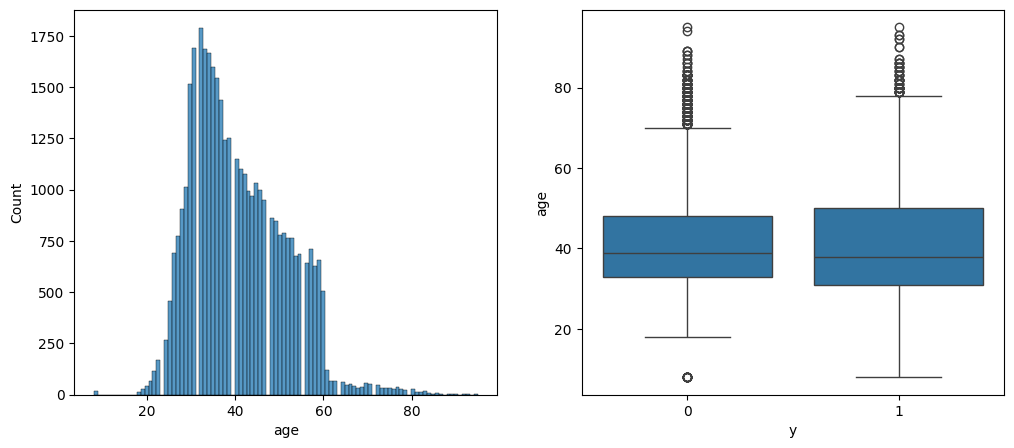

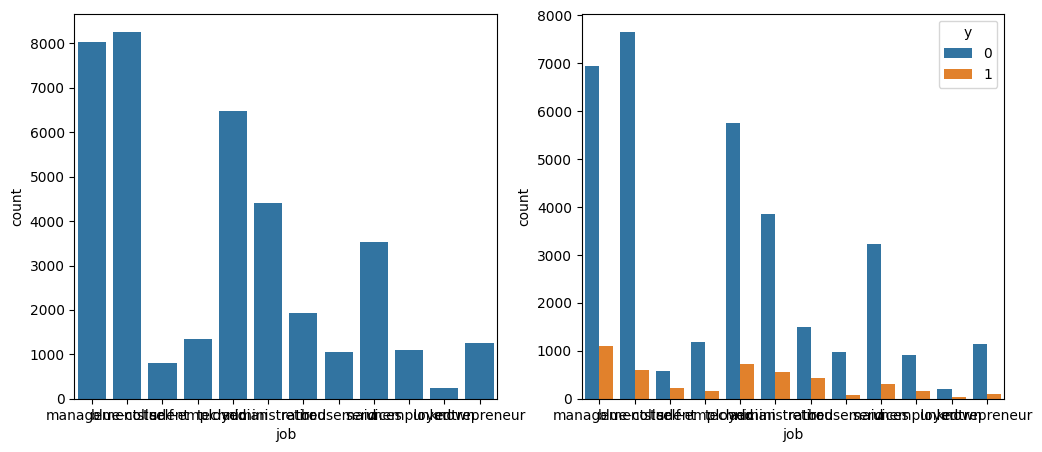

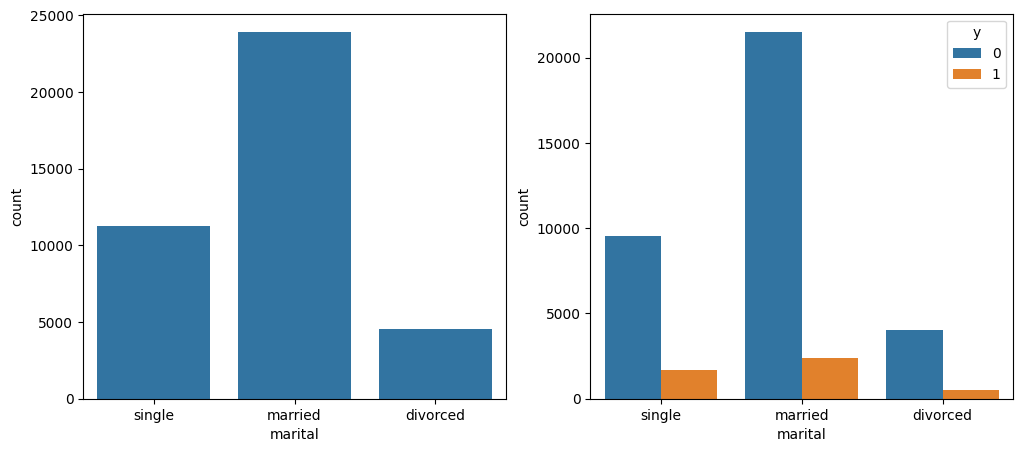

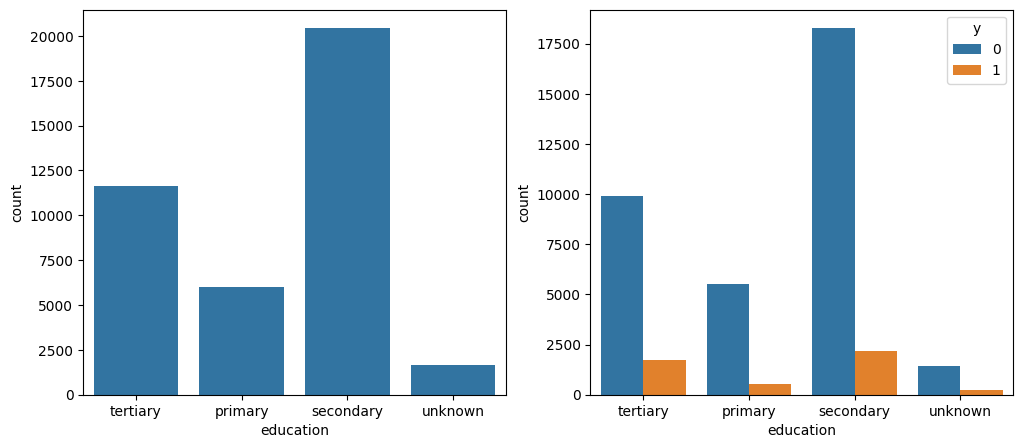

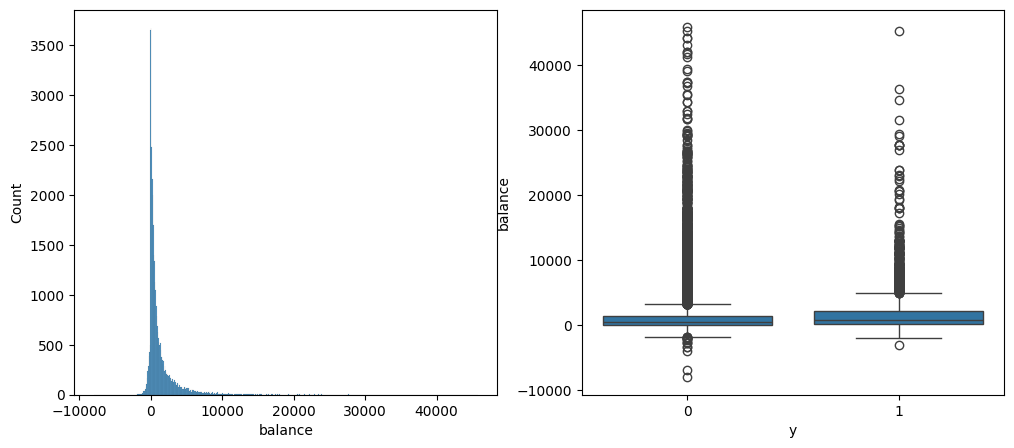

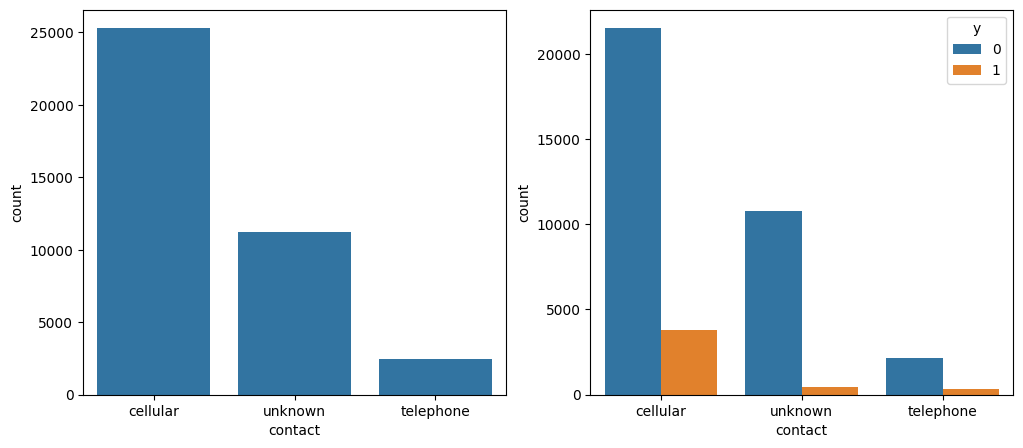

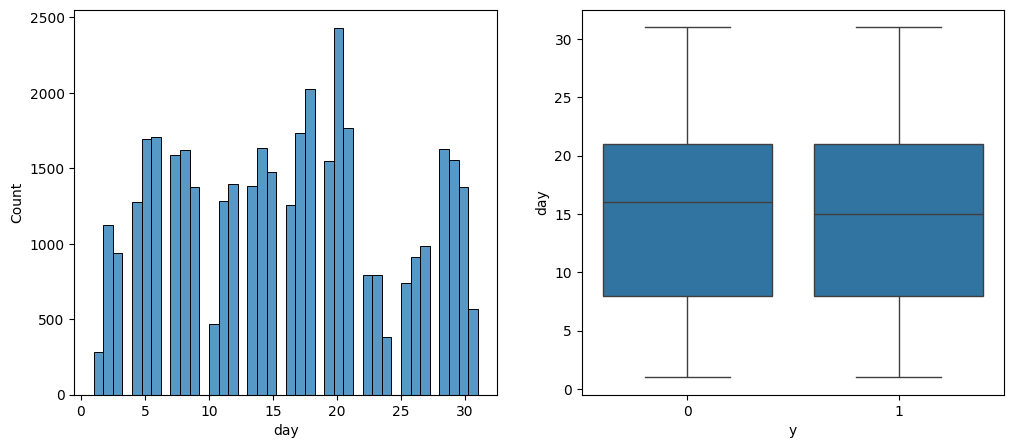

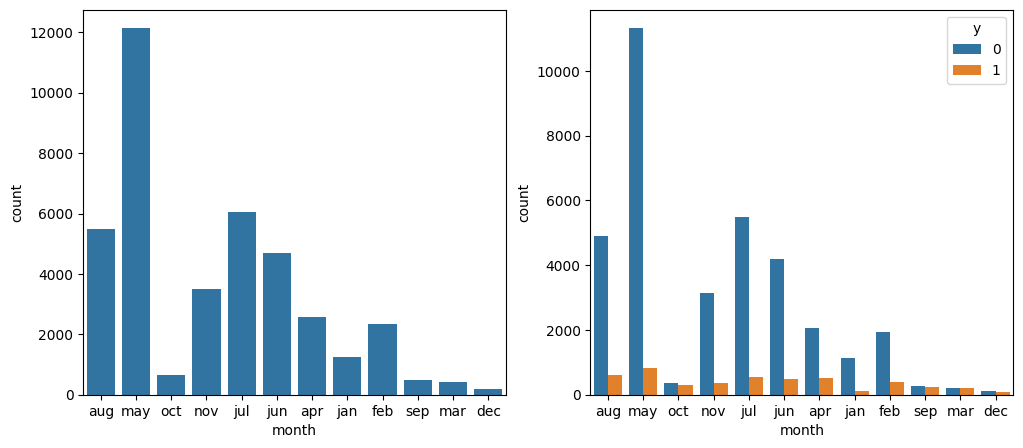

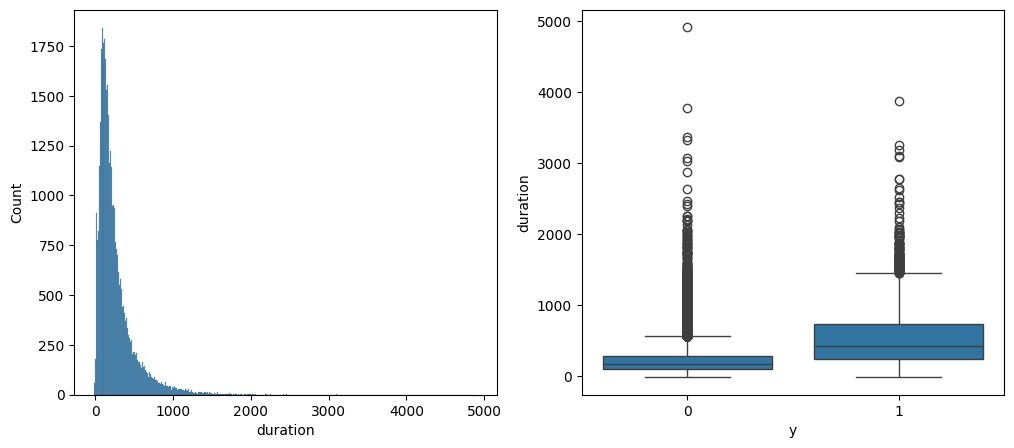

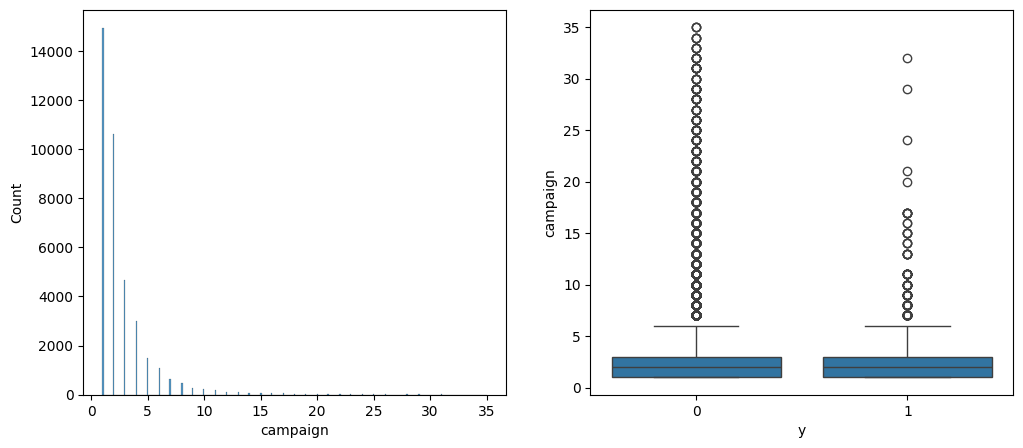

In [ ]:
for feature in (df.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df, x = feature, hue = "y")
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = feature, x = "y")
    plt.show()

In [ ]:
def analyze_category_influence(df, feature, target):
    # Contar o número de ocorrências de cada categoria no feature
    category_counts = df[feature].value_counts()

    # Contar o número de ocorrências de cada categoria para cada valor do target
    category_target_counts = df.groupby([feature, target]).size().unstack(fill_value=0)

    # Calcular a proporção de cada categoria em relação aos valores positivos e negativos do target
    category_proportions = category_target_counts.div(category_target_counts.sum(axis=1), axis=0)

    # Juntar contagens e proporções em um único DataFrame
    result = category_counts.to_frame(name='total_count').join(category_proportions)

    # Calcular a proporção relativa entre '1's e '0's
    result['relative_proportion'] = result[1] / result[0]

    return result

In [ ]:
#job
result = analyze_category_influence(df, 'job', 'y')
print(result)


               total_count    0    1  relative_proportion
job                                                      
blue-collar           8257 0.93 0.07                 0.08
management            8034 0.86 0.14                 0.16
technician            6479 0.89 0.11                 0.13
administrator         4400 0.88 0.12                 0.14
services              3535 0.91 0.09                 0.09
retired               1931 0.77 0.23                 0.29
self-employed         1337 0.89 0.11                 0.13
entrepreneur          1245 0.92 0.08                 0.09
unemployed            1087 0.85 0.15                 0.18
housemaid             1057 0.92 0.08                 0.09
student                807 0.72 0.28                 0.38
unknown                238 0.87 0.13                 0.14


In [ ]:
#marital
result = analyze_category_influence(df, 'marital', 'y')
print(result)

          total_count    0    1  relative_proportion
marital                                             
married         23911 0.90 0.10                 0.11
single          11271 0.85 0.15                 0.18
divorced         4564 0.88 0.12                 0.13


In [ ]:
#education
result = analyze_category_influence(df, 'education', 'y')
print(result)


           total_count    0    1  relative_proportion
education                                            
secondary        20440 0.89 0.11                 0.12
tertiary         11656 0.85 0.15                 0.18
primary           6017 0.92 0.08                 0.09
unknown           1633 0.86 0.14                 0.16


In [ ]:
#contact
result = analyze_category_influence(df, 'contact', 'y')
print(result)


           total_count    0    1  relative_proportion
contact                                              
cellular         25295 0.85 0.15                 0.18
unknown          11245 0.96 0.04                 0.04
telephone         2476 0.87 0.13                 0.15


In [ ]:
#month
result = analyze_category_influence(df, 'month', 'y')
print(result)

       total_count    0    1  relative_proportion
month                                            
may          12141 0.93 0.07                 0.07
jul           6036 0.91 0.09                 0.10
aug           5493 0.89 0.11                 0.12
jun           4682 0.90 0.10                 0.11
nov           3491 0.90 0.10                 0.11
apr           2581 0.80 0.20                 0.25
feb           2329 0.83 0.17                 0.20
jan           1256 0.90 0.10                 0.11
oct            646 0.56 0.44                 0.79
sep            493 0.54 0.46                 0.84
mar            410 0.48 0.52                 1.09
dec            188 0.54 0.46                 0.86


Deletando colunas sem uma correlação grande com o target

In [ ]:
df.drop(columns = ['marital','contact'], axis = 1, inplace = True)

#1.3) Encoding e Preenchimento de Dados

One-Hot Encoding Manual(binário) :  default, housing, loan, contact, y

Objetos de One-Hot Encoding: job, month

Objetos de Ordinalização e Normalização: education, poutcome

Objetos de Normalização: age, balance, duration, campaign, day

In [ ]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,41.00,management,tertiary,0,4522.00,0,0,28,aug,55,1.00,-1,0.00,unknown,0
1,42.00,blue-collar,primary,1,398.00,1,0,16,may,251,4.00,-1,0.00,unknown,0
2,26.00,student,secondary,0,706.00,0,0,8,oct,118,1.00,105,2.00,other,0
3,54.00,management,tertiary,0,0.00,0,1,19,nov,307,3.00,-1,0.00,unknown,0
4,43.00,self-employed,secondary,0,918.00,1,0,6,may,193,1.00,-1,0.00,unknown,0


In [ ]:
df['education'].unique()

array(['tertiary', 'primary', 'secondary', 'unknown'], dtype=object)

In [ ]:
df.replace('unknown', np.nan, inplace=True)

In [ ]:
df['education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

In [ ]:
df['poutcome'].unique()

array([nan, 'other', 'failure', 'success'], dtype=object)

In [ ]:
contagem = df['poutcome'].value_counts()
vazio = df['poutcome'].isnull().sum()
print(contagem)
print('tem :', vazio, ' linhas vazias')

poutcome
failure    4298
other      1631
success    1336
Name: count, dtype: int64
tem : 32481  linhas vazias


Não temos como trabalhar com a coluna de poutcome pois a quantidade de dados que não temos supera em muito a quantidade de dados que temos, portanto vamos excluí-la.

In [ ]:
df.drop(columns = 'poutcome', axis = 1, inplace = True)

In [ ]:
replacer2 = { 'primary': 0, 'secondary': 0.5, 'tertiary' : 1}
df['education'] = df['education'].replace(replacer2)

In [ ]:
df.head(20)

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,41.00,management,1.00,0,4522.00,0,0,28,aug,55,1.00,-1,0.00,0
1,42.00,blue-collar,0.00,1,398.00,1,0,16,may,251,4.00,-1,0.00,0
2,26.00,student,0.50,0,706.00,0,0,8,oct,118,1.00,105,2.00,0
3,54.00,management,1.00,0,0.00,0,1,19,nov,307,3.00,-1,0.00,0
4,43.00,self-employed,0.50,0,918.00,1,0,6,may,193,1.00,-1,0.00,0
5,34.00,technician,0.50,0,52.00,0,0,19,aug,90,4.00,-1,0.00,0
6,40.00,management,1.00,0,143.00,0,0,13,aug,832,6.00,-1,0.00,0
7,41.00,blue-collar,0.50,0,NaN,1,0,31,jul,228,4.00,-1,0.00,0
8,45.00,blue-collar,0.00,0,1794.00,1,0,14,may,174,2.00,-1,0.00,0
9,51.00,management,0.50,0,NaN,1,0,16,jun,1248,NaN,-1,0.00,1


Vamos agora aplicar one hot-encoding nas devidas categorias

In [ ]:
# Selecionar as colunas categóricas
categorical_columns = ['job', 'month']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df[categorical_columns], columns=categorical_columns)
#binarizando
df_encoded = df_encoded.astype(int)
df_encoded.head()


,job_administrator,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Vamos normalizar as features numéricas

In [ ]:
normalizando = ['education', 'age', 'balance', 'duration', 'campaign', 'day','pdays','previous']
scaler = MinMaxScaler()
norm = scaler.fit_transform(df[normalizando])

# Convertendo o array numpy de volta para um DataFrame do Pandas
df_norm = pd.DataFrame(norm, columns=normalizando)
df_norm.head()

,education,age,balance,duration,campaign,day,pdays,previous
0,1.00,0.38,0.23,0.02,0.00,0.90,0.00,0.00
1,0.00,0.39,0.16,0.05,0.09,0.50,0.00,0.00
2,0.50,0.21,0.16,0.03,0.00,0.23,0.15,0.07
3,1.00,0.53,0.15,0.07,0.06,0.60,0.00,0.00
4,0.50,0.40,0.17,0.04,0.00,0.17,0.00,0.00


In [ ]:
#Reformatando o dataframe
df.drop(columns = categorical_columns, axis = 1, inplace = True)
df.drop(columns = normalizando, axis = 1, inplace = True)

df_aux = pd.concat([df_encoded, df_norm], axis=1)
df = pd.concat([df_aux, df], axis=1)

df.head()

,job_administrator,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education,age,balance,duration,campaign,day,pdays,previous,default,housing,loan,y
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.00,0.38,0.23,0.02,0.00,0.90,0.00,0.00,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.39,0.16,0.05,0.09,0.50,0.00,0.00,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.50,0.21,0.16,0.03,0.00,0.23,0.15,0.07,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.00,0.53,0.15,0.07,0.06,0.60,0.00,0.00,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.50,0.40,0.17,0.04,0.00,0.17,0.00,0.00,0,1,0,0


In [ ]:
df.isnull().sum()

job_administrator       0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
month_apr               0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct               0
month_sep               0
education            1633
age                  1189
balance              1782
duration                0
campaign             1387
day                     0
pdays                   0
previous              296
default                 0
housing                 0
loan                    0
y                       0
dtype: int64

Como nosso dataset é relativamente pequeno e já tratamos manualmente casos mais extremos de outliers ou colunas problemáticas podemos terminar o serviço de preenchimento de valores faltantes com o método KNN, que trará para esse conjunto de dados relativamente comportado, conforme vimos nos gráficos anteriores, uma boa estimativa.

In [ ]:
# Separar as features e a coluna target
X = df.iloc[:, :-1]  # Todas as colunas menos a última
y = df.iloc[:, -1]   # A última coluna (target)

# Criar o imputer KNN
imputer = KNNImputer(n_neighbors = 5)

# Ajustar o imputer e transformar os dados
X_imputed = imputer.fit_transform(X)

# Criar um novo DataFrame com os dados preenchidos
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Adicionar a coluna target de volta
df_imputed['y'] = y
df = df_imputed

In [ ]:
df.isnull().sum()

job_administrator    0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
month_apr            0
month_aug            0
month_dec            0
month_feb            0
month_jan            0
month_jul            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
month_oct            0
month_sep            0
education            0
age                  0
balance              0
duration             0
campaign             0
day                  0
pdays                0
previous             0
default              0
housing              0
loan                 0
y                    0
dtype: int64

In [ ]:
df.tail()

,job_administrator,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education,age,balance,duration,campaign,day,pdays,previous,default,housing,loan,y
39741,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.40,0.41,0.06,0.00,0.67,0.00,0.00,0.00,1.00,0.00,0
39742,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.30,0.16,0.04,0.03,0.43,0.00,0.00,0.00,1.00,0.00,0
39743,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.25,0.24,0.11,0.03,0.33,0.00,0.00,0.00,0.00,0.00,1
39744,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.37,0.15,0.03,0.06,0.67,0.15,0.13,0.00,1.00,0.00,0
39745,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.60,0.16,0.02,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0


De 40000 dados perdemos apenas 255 na limpeza, o que representa 0,64% de perda de informação apenas, não irá afetar o resultado do treinamento.

#1.4) Preparando o modelo para exportação



In [ ]:
from google.colab import drive



In [ ]:

# Especificar o caminho no Google Drive
# Salvar o dataset limpo
df.to_csv('dataset_limpo.csv', index=False)

Exportando as Configurações Usadas


In [ ]:
import joblib
joblib.dump(imputer, 'knn_imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']